## Author
Jarosław Wełeszczuk

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, make_scorer

import seaborn as sns

In [2]:
caly_df=pd.read_csv('Prepared_geko_data.csv',sep=';')

In [3]:
caly_df

,time,temperatur,Sleep poze,Sleep position,splashing reaction,splashing reaction 2,touch reaction,behaviour on hand,after putting away,SPz | S shape,...,TR | runs,TR | moves,BoH | no movement,BoH | runs,BoH | jumps,BoH | moves,ApA | runs,ApA | hides,ApA | moves,ApA | stayes in place
0,10,23,straight,in the hideout,No Movement,does not licks,No Movement,No Movement,stays in place,0,...,0,0,1,0,0,0,0,0,0,1
1,10,23,U shape,in the hideout,moves the head,does not licks,Runs,Runs,stays in place,0,...,1,0,0,1,0,0,0,0,0,1
2,10,23,active,active,No Movement,does not licks,No Movement,jumps,Runs,0,...,0,0,0,0,1,0,1,0,0,0
3,10,23,active,active,moves,licks,Runs,Runs,Runs,0,...,1,0,0,1,0,0,1,0,0,0
4,10,23,straight,in the hideout,moves the head,licks,Runs,No Movement,stays in place,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,16,26,straight,on coconut,moves the head,licks,No Movement,Runs,stays in place,0,...,0,0,0,1,0,0,0,0,0,1
2063,16,26,straight,back wall,moves the head,does not licks,No Movement,jumps,stays in place,0,...,0,0,0,0,1,0,0,0,0,1
2064,16,26,active,active,moves,licks,moves,Runs,moves,0,...,0,1,0,1,0,0,0,0,1,0
2065,16,26,active,active,moves,licks,moves,moves,moves,0,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

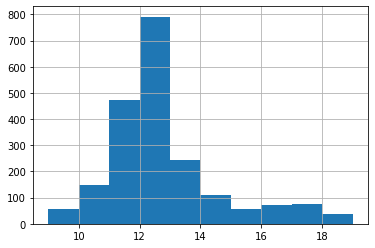

In [4]:
caly_df['time'].hist()

<AxesSubplot:>

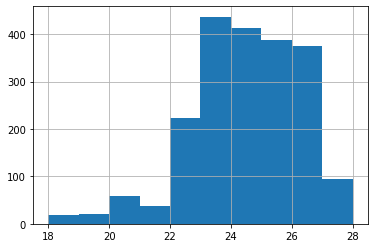

In [5]:
caly_df['temperatur'].hist()

In [6]:
caly_label=caly_df['splashing reaction 2']

In [7]:
del caly_df['Sleep poze']
del caly_df['Sleep position']
del caly_df['splashing reaction']
del caly_df['splashing reaction 2']
del caly_df['touch reaction']
del caly_df['behaviour on hand']
del caly_df['after putting away']

In [8]:
del caly_df['SR2 | does not licks']
del caly_df['SR2 | licks']

In [9]:
caly_label

0       does not licks
1       does not licks
2       does not licks
3                licks
4                licks
             ...      
2062             licks
2063    does not licks
2064             licks
2065             licks
2066    does not licks
Name: splashing reaction 2, Length: 2067, dtype: object

In [10]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   time                   2067 non-null   int64
 1   temperatur             2067 non-null   int64
 2   SPz | S shape          2067 non-null   int64
 3   SPz | U shape          2067 non-null   int64
 4   SPz | active           2067 non-null   int64
 5   SPz | straight         2067 non-null   int64
 6   SPs | active           2067 non-null   int64
 7   SPs | back wall        2067 non-null   int64
 8   SPs | front wall       2067 non-null   int64
 9   SPs | in the hideout   2067 non-null   int64
 10  SPs | left wall        2067 non-null   int64
 11  SPs | on coconut       2067 non-null   int64
 12  SPs | right wall       2067 non-null   int64
 13  SR | no movement       2067 non-null   int64
 14  SR | moves             2067 non-null   int64
 15  SR | moves the head    2067 non-null  

In [11]:
param_grid = {
    'criterion':['mse','friedman_mse'],#
    'min_samples_split':range(5,31,15), #
    'min_samples_leaf': range(5,31,15),     #
    'max_leaf_nodes':range(5,36,10), #
    'max_depth':list(range(5, 36,10)), #
    'n_estimators':[100],
    'learning_rate':[0.1,0.4],#
    'max_features':['auto','sqrt','log2',None],
    'min_weight_fraction_leaf':[0.0,0.2],
    'min_impurity_decrease':[0.0,0.2]
}

In [12]:
f1 = make_scorer(f1_score , average='macro')

In [13]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 4096 candidates, totalling 8192 fits


D:\anaconda\envs\notebook2\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

KeyboardInterrupt: 

In [ ]:
grid_search_1.best_score_ 

In [ ]:
grid_search_1.best_estimator_

In [ ]:
grid_search_1.best_params_

In [33]:
param_grid = {
    'criterion':['mse'],#
    'min_samples_split':range(5,31,15), #
    'min_samples_leaf': range(5,31,15),     #
    'max_leaf_nodes':range(5,10,2), #
    'max_depth':list(range(5, 10,2)), 
    'n_estimators':[100],
    'learning_rate':[0.1,0.2],
    'max_features':['auto'],
    'min_weight_fraction_leaf':[0.2,0.4],
    'min_impurity_decrease':[0.0,0.1]
}

In [34]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 288 candidates, totalling 576 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.1, 0.2],
                         'max_depth': [5, 7, 9], 'max_features': ['auto'],
                         'max_leaf_nodes': range(5, 10, 2),
                         'min_impurity_decrease': [0.0, 0.1],
                         'min_samples_leaf': range(5, 31, 15),
                         'min_samples_split': range(5, 31, 15),
                         'min_weight_fraction_leaf': [0.2, 0.4],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [35]:
grid_search_1.best_score_

0.5770744879592256

In [36]:
grid_search_1.best_estimator_

GradientBoostingClassifier(criterion='mse', max_depth=5, max_features='auto',
                           max_leaf_nodes=5, min_samples_leaf=5,
                           min_samples_split=5, min_weight_fraction_leaf=0.2,
                           random_state=42)

In [37]:
grid_search_1.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.2,
 'n_estimators': 100}

In [38]:
param_grid = {
    'criterion':['mse'],#
    'min_samples_split':range(2,7,1), #
    'min_samples_leaf': range(2,7,1),     #
    'max_leaf_nodes':range(2,6,1), #
    'max_depth':list(range(2, 6,1)), # 
    'n_estimators':[100],
    'learning_rate':[0.1], #
    'max_features':['auto'], #
    'min_weight_fraction_leaf':[0.1,0.2,0.3], #
    'min_impurity_decrease':[0.0] #
}

In [39]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.1],
                         'max_depth': [2, 3, 4, 5], 'max_features': ['auto'],
                         'max_leaf_nodes': range(2, 6),
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': range(2, 7),
                         'min_samples_split': range(2, 7),
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [40]:
grid_search_1.best_score_

0.5832225508668754

In [41]:
grid_search_1.best_estimator_

GradientBoostingClassifier(criterion='mse', max_depth=2, max_features='auto',
                           max_leaf_nodes=2, min_samples_leaf=2,
                           min_weight_fraction_leaf=0.2, random_state=42)

In [42]:
grid_search_1.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 2,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.2,
 'n_estimators': 100}

In [51]:
param_grid = {
    'criterion':['mse'],#
    'min_samples_split':[2], #
    'min_samples_leaf': [2],     #
    'max_leaf_nodes':[2], #
    'max_depth':[2], # 
    'n_estimators':[100,500,1000],
    'learning_rate':[0.1], #
    'max_features':['auto'], #
    'min_weight_fraction_leaf':[0.2], #
    'min_impurity_decrease':[0.0] #
}

In [52]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.1],
                         'max_depth': [2], 'max_features': ['auto'],
                         'max_leaf_nodes': [2], 'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.2],
                         'n_estimators': [100, 500, 1000]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [53]:
grid_search_1.best_score_

0.5832225508668754

In [54]:
grid_search_1.best_estimator_

GradientBoostingClassifier(criterion='mse', max_depth=2, max_features='auto',
                           max_leaf_nodes=2, min_samples_leaf=2,
                           min_weight_fraction_leaf=0.2, random_state=42)

In [55]:
grid_search_1.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 2,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.2,
 'n_estimators': 100}

In [49]:
caly_df

,time,temperatur,SPz_|_S_shape,SPz_|_U_shape,SPz_|_active,SPz_|_straight,SPs_|_active,SPs_|_back_wall,SPs_|_front_wall,SPs_|_in_the_hideout,...,TR_|_runs,TR_|_moves,BoH_|_no_movement,BoH_|_runs,BoH_|_jumps,BoH_|_moves,ApA_|_runs,ApA_|_hides,ApA_|_moves,ApA_|_stayes_in_place
0,10,23,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,10,23,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2,10,23,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,10,23,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,10,23,0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,16,26,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2063,16,26,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2064,16,26,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2065,16,26,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [30]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(caly_df, caly_label):
    
    RF_1 =GradientBoostingClassifier(criterion='mse', max_depth=2, max_features='auto',
                           max_leaf_nodes=2, min_samples_leaf=2,
                           min_weight_fraction_leaf=0.2, random_state=42)
    RF_1.fit(caly_df.iloc[train],
             caly_label.iloc[train])
    predykcje=RF_1.predict(caly_df.iloc[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label.iloc[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    
    sredni_blad=f1_score(caly_label.iloc[test], predykcje, average='macro')
    wart_1.append(sredni_blad)
    licznik+=1

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\sit

In [14]:
wart_1

[0.44097222222222227,
 0.5799941843559174,
 0.6082213438735178,
 0.5699993964268469,
 0.6033874682371738]

In [15]:
sum(wart_1)/len(wart_1)

0.5605149230231357

In [16]:
confusion_matrix(dane_do_zapisu_1['obs'], dane_do_zapisu_1['pred'], labels=list(pd.unique(caly_label)))

array([[1086,  252],
       [ 496,  233]], dtype=int64)

In [17]:
class_names = RF_1.classes_


In [18]:
cf_matrix=confusion_matrix(dane_do_zapisu_1[dane_do_zapisu_1['Fold']==5]['obs'],
                           dane_do_zapisu_1[dane_do_zapisu_1['Fold']==5]['pred'],
                           labels=class_names)

Text(0.5, 1.0, 'GradientBoosting - splashing reaction 2')

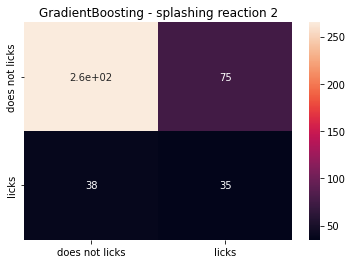

In [19]:
x_axis_labels = class_names
y_axis_labels = class_names

# create seabvorn heatmap with required labels
ax=sns.heatmap(cf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)
ax.set_title('GradientBoosting - splashing reaction 2')

In [19]:
#dane_do_zapisu_1.to_csv('Geko_GB__Splashing reaction 2.csv',sep=',')

In [25]:
RF_1.estimators_[0][0]

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features='auto',
                      max_leaf_nodes=2, min_samples_leaf=2,
                      min_weight_fraction_leaf=0.2,
                      random_state=RandomState(MT19937) at 0x17EE5504240)

In [26]:
RF_1 =GradientBoostingClassifier(criterion='mse', max_depth=2, max_features='auto',
                           max_leaf_nodes=2, min_samples_leaf=2,
                           min_weight_fraction_leaf=0.2, random_state=42,n_estimators=1)
RF_1.fit(caly_df.iloc[train],
         caly_label.iloc[train])

D:\anaconda\envs\notebook2\lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\anaconda\envs\notebook2\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


GradientBoostingClassifier(criterion='mse', max_depth=2, max_features='auto',
                           max_leaf_nodes=2, min_samples_leaf=2,
                           min_weight_fraction_leaf=0.2, n_estimators=1,
                           random_state=42)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import numpy as np


In [32]:
from pydotplus import graph_from_dot_data
from IPython.display import Image
from pathlib import Path

In [34]:

# Get the tree number 42
sub_tree_42 = RF_1.estimators_[0, 0]


In [44]:
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=False, rounded=True,
    special_characters=True,
    proportion=True, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)


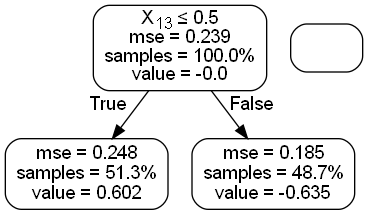

In [45]:

Path('./GB Splashing Reaction 2 tree.png').write_bytes(png)
# Display
Image(png)

In [46]:
list(caly_df)[13]

'SR | no movement'